In [101]:
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.over_sampling import SMOTE

In [102]:
# 生成随机样本
X, y = make_classification(n_samples=150,
                           weights=(0.1, 0.2, 0.7),
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=3,
                           random_state=0,
                           class_sep=0.8,
                           n_clusters_per_class=1)
print(X.shape)
print(np.unique(y))
print(np.argwhere(y == 0).shape[0])  # y=0共有10个样本
print(np.argwhere(y == 1).shape[0])  # y=1共有20个样本
print(np.argwhere(y == 2).shape[0])  # y=2共有70个样本

(150, 2)
[0 1 2]
16
31
103


In [103]:
# 绘制重采样后的样本空间
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="r")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title, fontsize=25, color='red')
    sns.despine(ax=ax, offset=10)
    return X_res, y_res

FunctionSampler:
样本总数量: (150,)
y=0样本数量: 16
y=1样本数量: 31
y=2样本数量: 103

SMOTE:
样本总数量: (309,)
y=0样本数量: 103
y=1样本数量: 103
y=2样本数量: 103



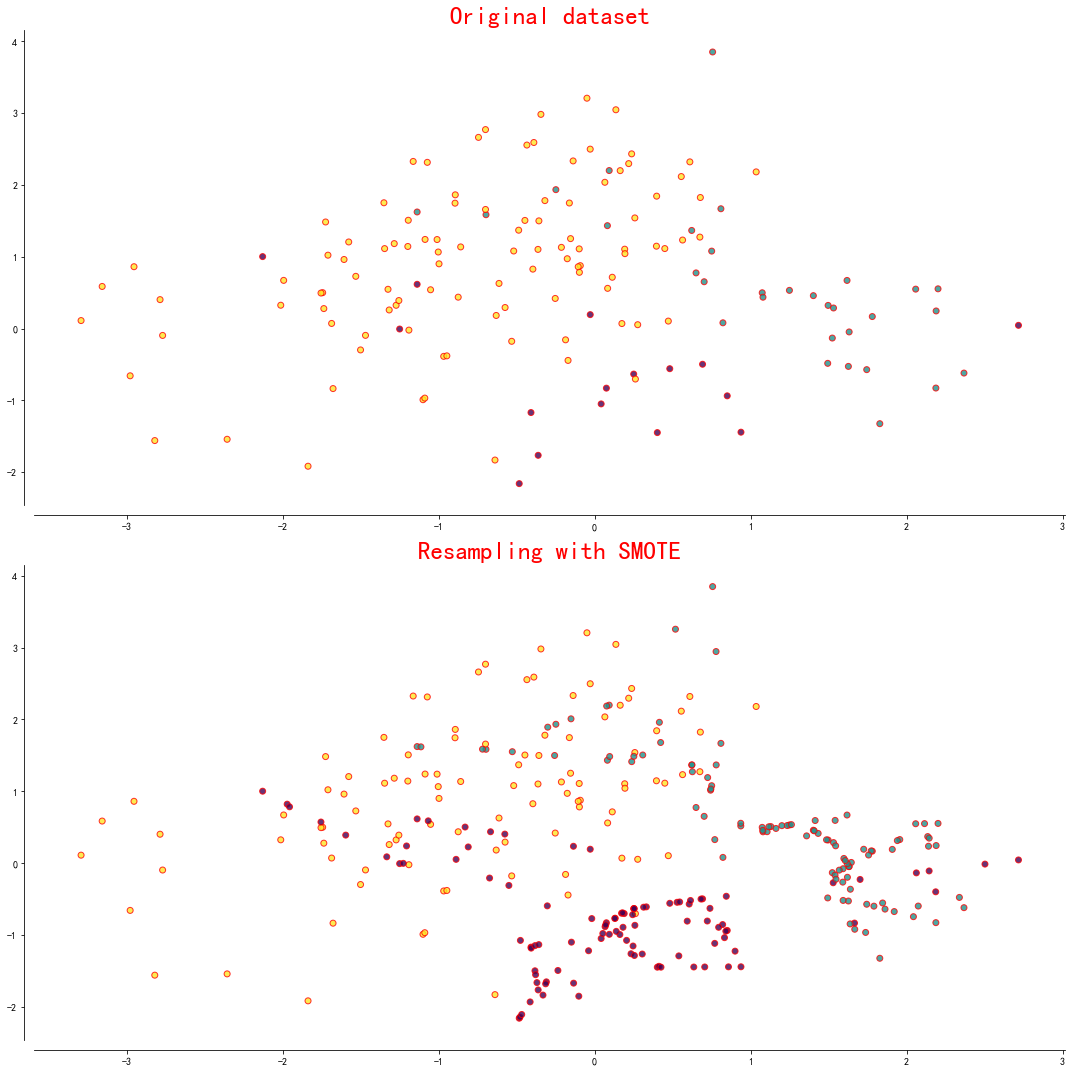

In [104]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

samplers = [
    FunctionSampler(),
    SMOTE(random_state=0,
          # If int, number of nearest neighbours to used to construct synthetic samples.
          # 默认值:5
          k_neighbors=5)
]

for ax, sampler in zip(axs.ravel(), samplers):
    title = "Original dataset" if isinstance(sampler, FunctionSampler) else None
    X_res, y_res = plot_resampling(X, y, sampler, ax, title=title)
    print(sampler.__class__.__name__ + ":")
    print("样本总数量:", y_res.shape)
    print("y=0样本数量:", np.argwhere(y_res == 0).shape[0])
    print("y=1样本数量:", np.argwhere(y_res == 1).shape[0])
    print("y=2样本数量:", np.argwhere(y_res == 2).shape[0], end='\n\n')
fig.tight_layout()